In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
import pandas as pd

# Read collision data
collision_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/collision_data2.xlsx", header=0, names=["time", "type", "lane", "pos", "collider", "victim", "colliderType", "victimType", "colliderSpeed", "victimSpeed"])

# Read FCD data
fcd_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/fcd_data2.xlsx")


In [3]:
collision_df

,time,type,lane,pos,collider,victim,colliderType,victimType,colliderSpeed,victimSpeed
0,19.8,collision,-E1_1,55.17,EGOVEHICLE,f_4.2,EGOVEHICLE,DEFAULTVEHCILE,3.89,3.59


In [4]:
fcd_df

,time,vehicle_id,x,y,angle,type,speed,position,lane,slope,acceleration
0,0.0,EGOVEHICLE,394.90,4.80,270.00,EGOVEHICLE,0.00,5.10,-E2_0,0,0.00
1,0.0,f_0.0,-26.47,-4.80,90.00,DEFAULTVEHCILE,0.00,73.53,E0_0,0,0.00
2,0.0,f_1.0,-16.98,-8.07,90.04,DEFAULTVEHCILE,0.00,129.56,E5_0,0,0.00
3,0.0,f_2.0,-14.68,-1.60,90.00,DEFAULTVEHCILE,0.00,85.32,E0_1,0,0.00
4,0.0,f_3.0,380.85,1.60,270.00,DEFAULTVEHCILE,0.00,19.15,-E2_1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
9134,26.0,f_5.5,94.90,8.00,270.00,DEFAULTVEHCILE,19.14,119.17,-E1_0,0,-5.00
9135,26.0,f_5.6,280.08,4.80,270.00,DEFAULTVEHCILE,16.99,20.27,-E3_1,0,2.36
9136,26.0,f_5.7,326.06,4.80,270.00,DEFAULTVEHCILE,18.57,73.94,-E2_0,0,2.75
9137,26.0,f_5.8,265.15,4.80,270.00,DEFAULTVEHCILE,16.94,35.20,-E3_1,0,3.51


In [5]:
import pandas as pd
import numpy as np

# Assuming 'fcd_df' is your DataFrame

# Group the DataFrame by 'time' and 'lane'
grouped = fcd_df.groupby(['time', 'lane'])

# Create empty columns to store nearest vehicle ID, least distance, and relative speed
fcd_df['nearest_vehicle_id'] = "0"
fcd_df['least_distance'] = 0.0
fcd_df['relative_speed'] = 0.0

for name, group in grouped:
    for index, row in group.iterrows():
        id_pos = row['position']
        id_speed = row['speed']
        other_vehicles = group[group['vehicle_id'] != row['vehicle_id']]  # Excluding the same id from comparison

        # Calculate distance to other vehicles
        other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
        
        if not other_vehicles.empty:
            # Find the row of the nearest vehicle
            min_distance_row = other_vehicles.loc[other_vehicles['distance_to_' + str(row['vehicle_id'])].idxmin()]
            fcd_df.at[index, 'nearest_vehicle_id'] = min_distance_row['vehicle_id']
            fcd_df.at[index, 'least_distance'] = min_distance_row['distance_to_' + str(row['vehicle_id'])]

            # Calculate relative speed
            nearest_vehicle_speed = min_distance_row['speed']
            relative_speed = abs(id_speed - nearest_vehicle_speed)
            fcd_df.at[index, 'relative_speed'] = relative_speed

# Display the updated DataFrame with the columns for nearest 'id', least distance, and relative speed
print(fcd_df)


C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

      time  vehicle_id       x     y   angle            type  speed  position  \
0      0.0  EGOVEHICLE  394.90  4.80  270.00      EGOVEHICLE   0.00      5.10   
1      0.0       f_0.0  -26.47 -4.80   90.00  DEFAULTVEHCILE   0.00     73.53   
2      0.0       f_1.0  -16.98 -8.07   90.04  DEFAULTVEHCILE   0.00    129.56   
3      0.0       f_2.0  -14.68 -1.60   90.00  DEFAULTVEHCILE   0.00     85.32   
4      0.0       f_3.0  380.85  1.60  270.00  DEFAULTVEHCILE   0.00     19.15   
...    ...         ...     ...   ...     ...             ...    ...       ...   
9134  26.0       f_5.5   94.90  8.00  270.00  DEFAULTVEHCILE  19.14    119.17   
9135  26.0       f_5.6  280.08  4.80  270.00  DEFAULTVEHCILE  16.99     20.27   
9136  26.0       f_5.7  326.06  4.80  270.00  DEFAULTVEHCILE  18.57     73.94   
9137  26.0       f_5.8  265.15  4.80  270.00  DEFAULTVEHCILE  16.94     35.20   
9138  26.0       f_5.9  372.94  4.80  270.00  DEFAULTVEHCILE   8.19     27.06   

       lane  slope  acceler

C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\314542615.py:21: SettingWithCopyWarning: 

In [6]:
# Sorting the DataFrame by the 'id' column
sorted_data = fcd_df.sort_values(by=['vehicle_id','time'])

In [7]:
sorted_data

,time,vehicle_id,x,y,angle,type,speed,position,lane,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
0,0.0,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.00,5.10,-E2_0,0,0.00,f_5.0,82.56,0.00
7,0.1,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.03,5.10,-E2_0,0,0.34,f_5.0,82.60,0.36
14,0.2,EGOVEHICLE,394.89,4.8,270.0,EGOVEHICLE,0.10,5.11,-E2_0,0,0.63,f_5.0,82.67,0.68
21,0.3,EGOVEHICLE,394.87,4.8,270.0,EGOVEHICLE,0.21,5.13,-E2_0,0,1.12,f_5.0,82.76,0.92
28,0.4,EGOVEHICLE,394.83,4.8,270.0,EGOVEHICLE,0.40,5.17,-E2_0,0,1.86,f_5.0,82.87,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978,25.6,f_5.9,376.42,4.8,270.0,DEFAULTVEHCILE,9.17,23.58,-E2_0,0,2.52,f_3.10,18.74,9.17
9018,25.7,f_5.9,375.49,4.8,270.0,DEFAULTVEHCILE,9.29,24.51,-E2_0,0,1.23,f_3.10,17.85,8.91
9058,25.8,f_5.9,374.61,4.8,270.0,DEFAULTVEHCILE,8.82,25.39,-E2_0,0,-4.79,f_3.10,17.04,8.05
9098,25.9,f_5.9,373.76,4.8,270.0,DEFAULTVEHCILE,8.53,26.24,-E2_0,0,-2.84,f_3.10,16.31,7.40


In [8]:
final_data = sorted_data[(sorted_data['vehicle_id'] == 'EGOVEHICLE') & (sorted_data['time'] <= 19.7) ]

In [9]:
final_data

,time,vehicle_id,x,y,angle,type,speed,position,lane,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
0,0.0,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.00,5.10,-E2_0,0,0.00,f_5.0,82.56,0.00
7,0.1,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.03,5.10,-E2_0,0,0.34,f_5.0,82.60,0.36
14,0.2,EGOVEHICLE,394.89,4.8,270.0,EGOVEHICLE,0.10,5.11,-E2_0,0,0.63,f_5.0,82.67,0.68
21,0.3,EGOVEHICLE,394.87,4.8,270.0,EGOVEHICLE,0.21,5.13,-E2_0,0,1.12,f_5.0,82.76,0.92
28,0.4,EGOVEHICLE,394.83,4.8,270.0,EGOVEHICLE,0.40,5.17,-E2_0,0,1.86,f_5.0,82.87,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6419,19.3,EGOVEHICLE,164.47,4.8,270.0,EGOVEHICLE,14.14,49.60,-E1_1,0,-10.00,f_4.2,10.77,8.51
6459,19.4,EGOVEHICLE,163.15,4.8,270.0,EGOVEHICLE,13.14,50.92,-E1_1,0,-10.00,f_4.2,9.97,7.90
6499,19.5,EGOVEHICLE,161.94,4.8,270.0,EGOVEHICLE,12.14,52.13,-E1_1,0,-10.00,f_4.2,9.24,7.31
6539,19.6,EGOVEHICLE,160.82,4.8,270.0,EGOVEHICLE,11.14,53.25,-E1_1,0,-10.00,f_4.2,8.56,6.77


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Assuming 'type' is the categorical column in your DataFrame
final_data['type'] = label_encoder.fit_transform(final_data['type'])
final_data['vehicle_id'] = label_encoder.fit_transform(final_data['vehicle_id'])
final_data['lane'] = label_encoder.fit_transform(final_data['lane'])
final_data['nearest_vehicle_id'] = label_encoder.fit_transform(final_data['nearest_vehicle_id'])



C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\2921627692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['type'] = label_encoder.fit_transform(final_data['type'])
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\2921627692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['vehicle_id'] = label_encoder.fit_transform(final_data['vehicle_id'])
C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\2921627692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [11]:
#Separate dates for future plotting
final_data['time'] = pd.to_datetime(final_data['time']*10000000)


C:\Users\saiko\AppData\Local\Temp\ipykernel_6960\2202376816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['time'] = pd.to_datetime(final_data['time']*10000000)


In [12]:
train_dates = final_data['time']

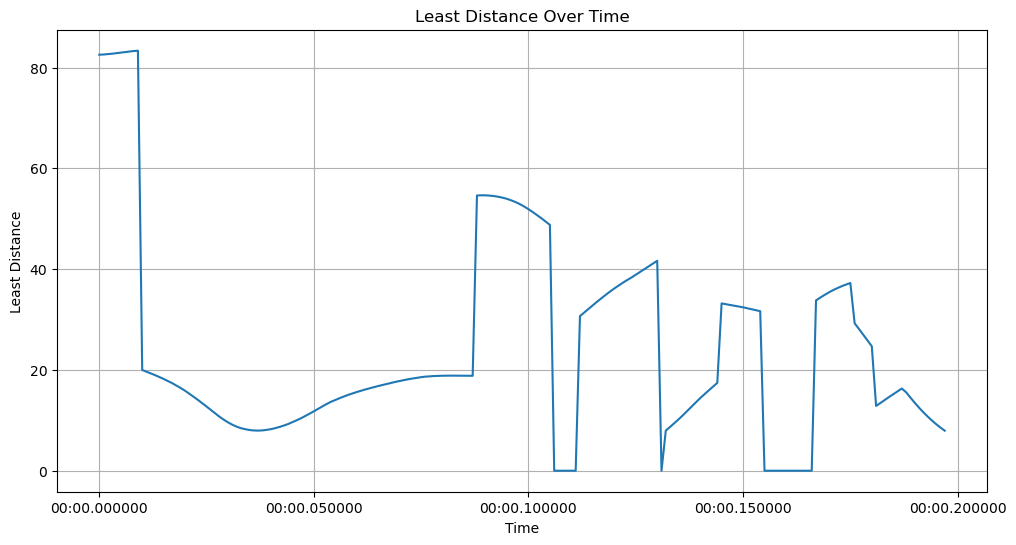

In [13]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(final_data['time'], final_data['least_distance'])
plt.title('Least Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Least Distance')
plt.grid(True)
plt.show()

In [14]:
final_data.set_index('time', inplace=True)

In [15]:
final_data=final_data.dropna()
print('Shape of data',final_data.shape)
final_data.head()
final_data

Shape of data (198, 13)


,vehicle_id,x,y,angle,type,speed,position,lane,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
time,,,,,,,,,,,,,
1970-01-01 00:00:00.000,0,394.90,4.8,270.0,0,0.00,5.10,1,0,0.00,4,82.56,0.00
1970-01-01 00:00:00.001,0,394.90,4.8,270.0,0,0.03,5.10,1,0,0.34,4,82.60,0.36
1970-01-01 00:00:00.002,0,394.89,4.8,270.0,0,0.10,5.11,1,0,0.63,4,82.67,0.68
1970-01-01 00:00:00.003,0,394.87,4.8,270.0,0,0.21,5.13,1,0,1.12,4,82.76,0.92
1970-01-01 00:00:00.004,0,394.83,4.8,270.0,0,0.40,5.17,1,0,1.86,4,82.87,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.193,0,164.47,4.8,270.0,0,14.14,49.60,0,0,-10.00,2,10.77,8.51
1970-01-01 00:00:00.194,0,163.15,4.8,270.0,0,13.14,50.92,0,0,-10.00,2,9.97,7.90
1970-01-01 00:00:00.195,0,161.94,4.8,270.0,0,12.14,52.13,0,0,-10.00,2,9.24,7.31


In [16]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [17]:
ad_test(final_data['least_distance'])

1. ADF :  -3.6729024616733508
2. P-Value :  0.004510858650872304
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 197
5. Critical Values :
	 1% :  -3.463987334463603
	 5% :  -2.8763259091636213
	 10% :  -2.5746515171738515


# SIMULATION_1

In [18]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Selecting the relevant columns
columns = ['relative_speed', 'least_distance']

# Splitting the dataset into training and testing sets
train_df = final_data[columns][:-20]  # All data except the last 12 observations
test_df = final_data[columns][-20:]   # Last 12 observations


In [74]:
train_df.diff()

,relative_speed,least_distance
time,,
1970-01-01 00:00:00.000,NaN,NaN
1970-01-01 00:00:00.001,0.36,0.04
1970-01-01 00:00:00.002,0.32,0.07
1970-01-01 00:00:00.003,0.24,0.09
1970-01-01 00:00:00.004,0.18,0.11
...,...,...
1970-01-01 00:00:00.173,-0.38,0.37
1970-01-01 00:00:00.174,-0.36,0.33
1970-01-01 00:00:00.175,-0.39,0.30


In [75]:
model = VAR(train_df.diff()[1:])

In [76]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       4.450*      4.489*      85.64*      4.466*
1        4.461       4.577       86.55       4.508
2        4.507       4.702       90.70       4.587
3        4.558       4.830       95.40       4.669
4        4.609       4.959       100.4       4.751
5        4.659       5.087       105.5       4.833
6        4.647       5.153       104.3       4.853
7        4.689       5.273       108.9       4.926
8        4.733       5.395       113.8       5.002
9        4.715       5.455       111.9       5.015
10       4.694       5.511       109.6       5.026
11       4.742       5.638       115.2       5.106
12       4.754       5.727       116.6       5.149
13       4.721       5.772       113.0       5.147
14       4.696       5.825       110.4       5.154
15       4.723       5.930       113.7       5.213
16       4.769       6.053     

In [77]:
var_model = VARMAX(train_df, order=(9,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=True)
print(fitted_model.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['relative_speed', 'least_distance']   No. Observations:                  178
Model:                                           VAR(9)   Log Likelihood                -916.410
                                            + intercept   AIC                           1914.821
Date:                                  Wed, 06 Dec 2023   BIC                           2045.274
Time:                                          23:31:43   HQIC                          1967.723
Sample:                                      01-01-1970                                         
                                           - 01-01-1970                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):             0.01, 0.05   Jarque-Bera (JB):     2474.94, 5755.65
Prob(Q):                        0.93, 0.83 

In [80]:
n_forecast = 20
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [81]:
predictions.columns=['relative_speed_predicted','least_distance_predicted']
predictions

,relative_speed_predicted,least_distance_predicted
1970-01-01 00:00:00.178,11.141562,26.162448
1970-01-01 00:00:00.179,10.995522,23.610416
1970-01-01 00:00:00.180,10.772083,21.385130
1970-01-01 00:00:00.181,9.966632,16.054772
1970-01-01 00:00:00.182,8.697495,8.131450
1970-01-01 00:00:00.183,8.132699,5.442624
1970-01-01 00:00:00.184,7.549206,1.985780
1970-01-01 00:00:00.185,7.084513,-0.906531
1970-01-01 00:00:00.186,6.678666,-3.165226
1970-01-01 00:00:00.187,6.455285,-4.173492


In [82]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [83]:
test_vs_pred

,relative_speed,least_distance,relative_speed_predicted,least_distance_predicted
1970-01-01 00:00:00.178,11.15,27.03,11.141562,26.162448
1970-01-01 00:00:00.179,11.67,25.86,10.995522,23.610416
1970-01-01 00:00:00.180,11.65,24.70,10.772083,21.385130
1970-01-01 00:00:00.181,5.74,12.86,9.966632,16.054772
1970-01-01 00:00:00.182,5.70,13.43,8.697495,8.131450
1970-01-01 00:00:00.183,5.98,14.03,8.132699,5.442624
1970-01-01 00:00:00.184,5.88,14.62,7.549206,1.985780
1970-01-01 00:00:00.185,5.78,15.19,7.084513,-0.906531
1970-01-01 00:00:00.186,5.64,15.76,6.678666,-3.165226
1970-01-01 00:00:00.187,5.47,16.31,6.455285,-4.173492


<Axes: >

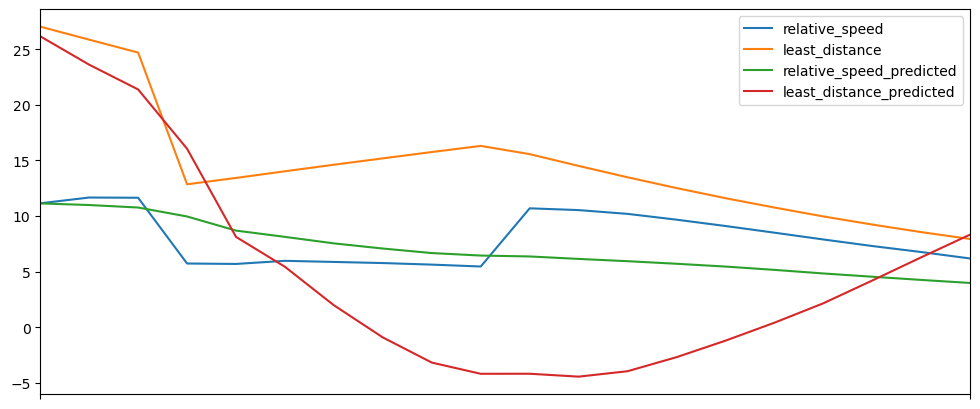

In [84]:
test_vs_pred.plot(figsize=(12,5))

# SIMULATION_1

In [85]:
import pandas as pd

# Read collision data
collision_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-9/collision_data.xlsx", header=None, names=["time", "type", "lane", "pos", "collider", "victim", "colliderType", "victimType", "colliderSpeed", "victimSpeed"])

# Read FCD data
fcd_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-9/FCD_Output.xlsx")


In [86]:
collision_df

,time,type,lane,pos,collider,victim,colliderType,victimType,colliderSpeed,victimSpeed
0,20.5,collision,-E1_1,83.28,EGOVEHICLE,f_4.2,EGOVEHICLE,DEFAULTVEHCILE,11.23,3.07


In [87]:
import pandas as pd
import numpy as np

# Assuming 'fcd_df' is your DataFrame

# Group the DataFrame by 'time' and 'lane'
grouped = fcd_df.groupby(['time', 'lane'])

# Create empty columns to store nearest vehicle ID, least distance, and relative speed
fcd_df['nearest_vehicle_id'] = "0"
fcd_df['least_distance'] = 0.0
fcd_df['relative_speed'] = 0.0

for name, group in grouped:
    for index, row in group.iterrows():
        id_pos = row['pos']
        id_speed = row['speed']
        other_vehicles = group[group['id'] != row['id']]  # Excluding the same id from comparison

        # Calculate distance to other vehicles
        other_vehicles['distance_to_' + str(row['id'])] = abs(other_vehicles['pos'] - id_pos)
        
        if not other_vehicles.empty:
            # Find the row of the nearest vehicle
            min_distance_row = other_vehicles.loc[other_vehicles['distance_to_' + str(row['id'])].idxmin()]
            fcd_df.at[index, 'nearest_vehicle_id'] = min_distance_row['id']
            fcd_df.at[index, 'least_distance'] = min_distance_row['distance_to_' + str(row['id'])]

            # Calculate relative speed
            nearest_vehicle_speed = min_distance_row['speed']
            relative_speed = abs(id_speed - nearest_vehicle_speed)
            fcd_df.at[index, 'relative_speed'] = relative_speed

# Display the updated DataFrame with the columns for nearest 'id', least distance, and relative speed
print(fcd_df)


       time          id       x      y   angle            type  speed    pos  \
0       0.0  EGOVEHICLE  394.90   4.80  270.00      EGOVEHICLE   0.00   5.10   
1       0.0       f_0.0  -23.66  -4.80   90.00  DEFAULTVEHCILE   0.00  76.34   
2       0.0       f_1.0  -62.10 -45.37   33.37  DEFAULTVEHCILE   0.00  66.46   
3       0.0       f_2.0  -76.05  -1.60   90.00  DEFAULTVEHCILE   0.00  23.95   
4       0.0       f_3.0  313.60   1.60  270.00  DEFAULTVEHCILE   0.00  86.40   
...     ...         ...     ...    ...     ...             ...    ...    ...   
10319  29.0      f_5.11  317.68   1.60  270.00  DEFAULTVEHCILE   2.96  82.32   
10320  29.0       f_5.6   60.23  21.31  323.50  DEFAULTVEHCILE  13.97  27.40   
10321  29.0       f_5.7  294.15   4.80  270.00  DEFAULTVEHCILE  18.08   6.20   
10322  29.0       f_5.8  280.44   4.80  270.00  DEFAULTVEHCILE  20.50  19.91   
10323  29.0       f_5.9  340.76   4.80  270.00  DEFAULTVEHCILE  11.93  59.24   

        lane  slope  acceleration neare

In [88]:
# Sorting the DataFrame by the 'id' column
sorted_data_1 = fcd_df.sort_values(by=['id','time'])

In [89]:
final_data_1 = sorted_data_1[(sorted_data_1['id'] == 'EGOVEHICLE') & (sorted_data_1['time'] <=20.4)]

In [90]:
final_data_1

,time,id,x,y,angle,type,speed,pos,lane,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
0,0.0,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.00,5.10,-E2_0,0,0.00,0,0.00,0.00
6,0.1,EGOVEHICLE,394.90,4.8,270.0,EGOVEHICLE,0.03,5.10,-E2_0,0,0.34,f_5.0,48.95,0.03
13,0.2,EGOVEHICLE,394.89,4.8,270.0,EGOVEHICLE,0.10,5.11,-E2_0,0,0.64,f_5.0,48.98,0.29
20,0.3,EGOVEHICLE,394.87,4.8,270.0,EGOVEHICLE,0.21,5.13,-E2_0,0,1.12,f_5.0,49.04,0.56
27,0.4,EGOVEHICLE,394.83,4.8,270.0,EGOVEHICLE,0.40,5.17,-E2_0,0,1.86,f_5.0,49.11,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,20.0,EGOVEHICLE,137.17,4.8,270.0,EGOVEHICLE,15.13,76.90,-E1_1,0,-8.76,f_4.2,11.14,9.92
6724,20.1,EGOVEHICLE,135.74,4.8,270.0,EGOVEHICLE,14.32,78.33,-E1_1,0,-8.10,f_4.2,10.19,9.55
6764,20.2,EGOVEHICLE,134.39,4.8,270.0,EGOVEHICLE,13.53,79.68,-E1_1,0,-7.95,f_4.2,9.28,9.19
6804,20.3,EGOVEHICLE,133.11,4.8,270.0,EGOVEHICLE,12.74,80.96,-E1_1,0,-7.86,f_4.2,8.39,8.83


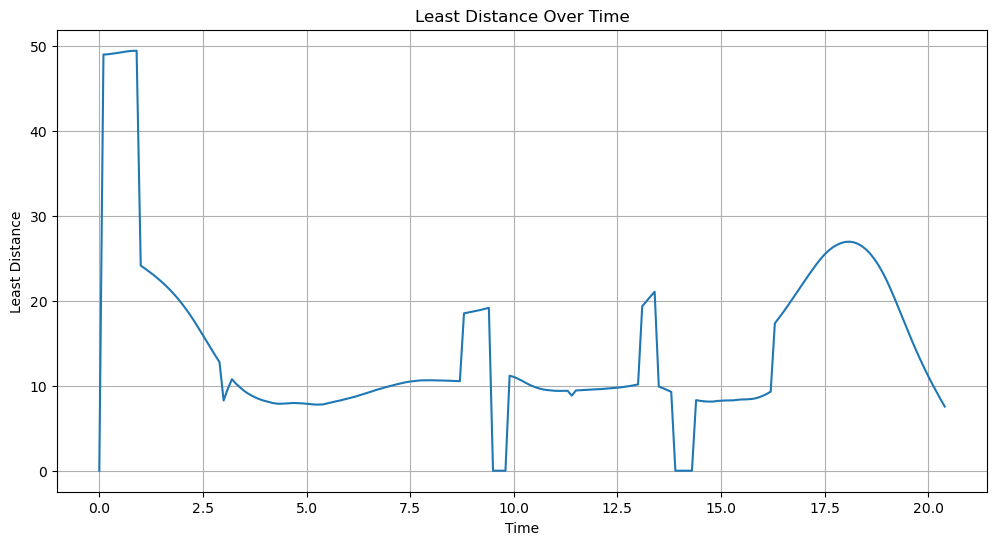

In [91]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(final_data_1['time'], final_data_1['least_distance'])
plt.title('Least Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Least Distance')
plt.grid(True)
plt.show()

In [92]:
#Separate dates for future plotting
final_data_1['time'] = pd.to_datetime(final_data_1['time']*10000000)
train_dates_1 = final_data_1['time']
final_data_1.set_index('time', inplace=True)

In [93]:
# Selecting the relevant columns
columns = ['relative_speed', 'least_distance']

# Splitting the dataset into training and testing sets
train_df = final_data_1[columns][:-20]  # All data except the last 12 observations
test_df = final_data_1[columns][-20:]   # Last 12 observations


In [94]:
model = VAR(train_df.diff()[1:])

In [95]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       2.178*      2.216*      8.830*      2.193*
1        2.218       2.331       9.185       2.264
2        2.224       2.413       9.248       2.301
3        2.272       2.537       9.702       2.380
4        2.279       2.619       9.770       2.417
5        2.321       2.737       10.19       2.490
6        2.368       2.859       10.68       2.568
7        2.399       2.966       11.02       2.629
8        2.429       3.072       11.37       2.690
9        2.467       3.185       11.81       2.758
10       2.513       3.307       12.38       2.835
11       2.554       3.424       12.91       2.907
12       2.599       3.544       13.51       2.983
13       2.642       3.663       14.13       3.057
14       2.685       3.781       14.77       3.130
15       2.718       3.890       15.29       3.194
16       2.703       3.950     

In [96]:
var_model = VARMAX(train_df, order=(9,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=True)
print(fitted_model.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['relative_speed', 'least_distance']   No. Observations:                  185
Model:                                           VAR(9)   Log Likelihood                -817.442
                                            + intercept   AIC                           1716.883
Date:                                  Wed, 06 Dec 2023   BIC                           1848.918
Time:                                          23:33:04   HQIC                          1770.393
Sample:                                      01-01-1970                                         
                                           - 01-01-1970                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):             0.00, 0.20   Jarque-Bera (JB):    2794.25, 10811.21
Prob(Q):                        0.97, 0.66 

In [97]:
n_forecast = 20
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [98]:
predictions.columns=['relative_speed_predicted','least_distance_predicted']
predictions

,relative_speed_predicted,least_distance_predicted
1970-01-01 00:00:00.185,2.780612,25.279826
1970-01-01 00:00:00.186,2.818281,23.469714
1970-01-01 00:00:00.187,3.038199,20.948452
1970-01-01 00:00:00.188,3.236728,18.102735
1970-01-01 00:00:00.189,3.436501,15.395326
1970-01-01 00:00:00.190,3.540738,12.327631
1970-01-01 00:00:00.191,3.522303,9.312545
1970-01-01 00:00:00.192,3.425481,6.677007
1970-01-01 00:00:00.193,3.331575,4.639054
1970-01-01 00:00:00.194,3.245823,2.900924


In [99]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [100]:
test_vs_pred

,relative_speed,least_distance,relative_speed_predicted,least_distance_predicted
1970-01-01 00:00:00.185,3.89,26.03,2.780612,25.279826
1970-01-01 00:00:00.186,5.01,25.53,2.818281,23.469714
1970-01-01 00:00:00.187,6.16,24.91,3.038199,20.948452
1970-01-01 00:00:00.188,7.35,24.18,3.236728,18.102735
1970-01-01 00:00:00.189,8.49,23.33,3.436501,15.395326
1970-01-01 00:00:00.190,9.67,22.37,3.540738,12.327631
1970-01-01 00:00:00.191,10.72,21.29,3.522303,9.312545
1970-01-01 00:00:00.192,11.36,20.15,3.425481,6.677007
1970-01-01 00:00:00.193,11.82,18.97,3.331575,4.639054
1970-01-01 00:00:00.194,12.00,17.77,3.245823,2.900924


<Axes: >

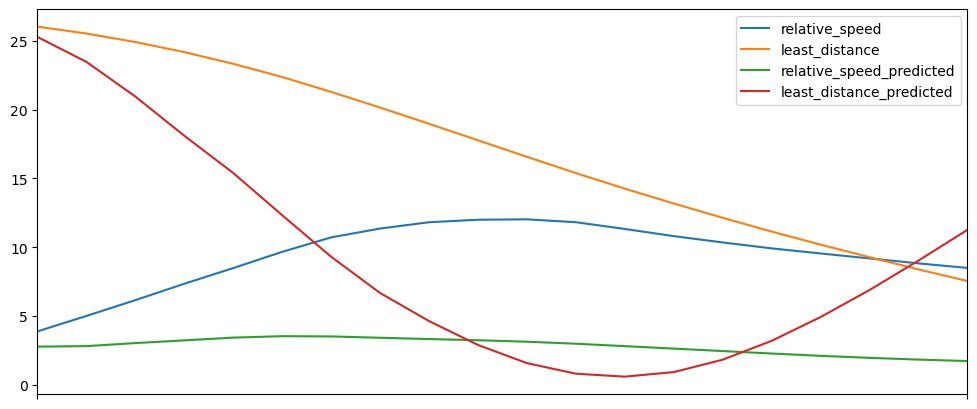

In [101]:
test_vs_pred.plot(figsize=(12,5))

# SIMULATION_2

In [102]:
import pandas as pd

# Read collision data
collision_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/collision_data1.xlsx", header=0, names=["time", "type", "lane", "pos", "collider", "victim", "colliderType", "victimType", "colliderSpeed", "victimSpeed"])

# Read FCD data
fcd_df = pd.read_excel("C:/Users/saiko/Desktop/699/Task-10/fcd_data1.xlsx")


In [103]:
collision_df

,time,type,lane,pos,collider,victim,colliderType,victimType,colliderSpeed,victimSpeed
0,7.1,collision,E5_0,99.07,EGOVEHICLE,f_1.4,EGOVEHICLE,DEFAULTVEHCILE,10.13,9.02


In [104]:
import pandas as pd
import numpy as np

# Assuming 'fcd_df' is your DataFrame

# Group the DataFrame by 'time' and 'lane'
grouped = fcd_df.groupby(['time', 'lane'])

# Create empty columns to store nearest vehicle ID, least distance, and relative speed
fcd_df['nearest_vehicle_id'] = "0"
fcd_df['least_distance'] = 0.0
fcd_df['relative_speed'] = 0.0

for name, group in grouped:
    for index, row in group.iterrows():
        id_pos = row['position']
        id_speed = row['speed']
        other_vehicles = group[group['vehicle_id'] != row['vehicle_id']]  # Excluding the same id from comparison

        # Calculate distance to other vehicles
        other_vehicles['distance_to_' + str(row['vehicle_id'])] = abs(other_vehicles['position'] - id_pos)
        
        if not other_vehicles.empty:
            # Find the row of the nearest vehicle
            min_distance_row = other_vehicles.loc[other_vehicles['distance_to_' + str(row['vehicle_id'])].idxmin()]
            fcd_df.at[index, 'nearest_vehicle_id'] = min_distance_row['vehicle_id']
            fcd_df.at[index, 'least_distance'] = min_distance_row['distance_to_' + str(row['vehicle_id'])]

            # Calculate relative speed
            nearest_vehicle_speed = min_distance_row['speed']
            relative_speed = abs(id_speed - nearest_vehicle_speed)
            fcd_df.at[index, 'relative_speed'] = relative_speed

# Display the updated DataFrame with the columns for nearest 'id', least distance, and relative speed
print(fcd_df)


      time  vehicle_id       x      y   angle            type  speed  \
0      0.0  EGOVEHICLE  -95.85 -96.62   33.37      EGOVEHICLE   0.00   
1      0.0       f_0.0  -55.08  -4.80   90.00  DEFAULTVEHCILE   0.00   
2      0.0       f_2.0  -52.22  -1.60   90.00  DEFAULTVEHCILE   0.00   
3      0.0       f_3.0  330.69   4.80  270.00  DEFAULTVEHCILE   0.00   
4      0.0       f_4.0  254.35  39.59  215.86  DEFAULTVEHCILE   0.00   
...    ...         ...     ...    ...     ...             ...    ...   
4413  14.2       f_5.2  111.32   8.00  270.00  DEFAULTVEHCILE  21.86   
4414  14.2       f_5.3  174.96   4.80  270.00  DEFAULTVEHCILE  26.34   
4415  14.2       f_5.4  223.88   4.80  270.00  DEFAULTVEHCILE  18.35   
4416  14.2       f_5.5  279.66   4.80  270.00  DEFAULTVEHCILE  16.87   
4417  14.2       f_5.6  311.22   4.80  270.00  DEFAULTVEHCILE  18.89   

      position     lane  slope  acceleration nearest_vehicle_id  \
0         5.10     E5_0      0          0.00                  0   
1

In [105]:
# Sorting the DataFrame by the 'id' column
sorted_data_2 = fcd_df.sort_values(by=['vehicle_id','time'])

In [106]:
sorted_data_2

,time,vehicle_id,x,y,angle,type,speed,position,lane,slope,acceleration,nearest_vehicle_id,least_distance,relative_speed
0,0.0,EGOVEHICLE,-95.85,-96.62,33.37,EGOVEHICLE,0.00,5.10,E5_0,0,0.00,0,0.00,0.00
6,0.1,EGOVEHICLE,-95.85,-96.62,33.37,EGOVEHICLE,0.03,5.10,E5_0,0,0.34,0,0.00,0.00
12,0.2,EGOVEHICLE,-95.85,-96.61,33.37,EGOVEHICLE,0.10,5.11,E5_0,0,0.64,f_1.0,77.86,0.10
19,0.3,EGOVEHICLE,-95.84,-96.59,33.37,EGOVEHICLE,0.21,5.13,E5_0,0,1.12,f_1.0,77.88,0.17
26,0.4,EGOVEHICLE,-95.81,-96.56,33.37,EGOVEHICLE,0.40,5.17,E5_0,0,1.86,f_1.0,77.92,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,13.8,f_5.6,318.78,4.80,270.00,DEFAULTVEHCILE,18.76,81.22,-E2_0,0,-1.22,0,0.00,0.00
4297,13.9,f_5.6,316.90,4.80,270.00,DEFAULTVEHCILE,18.84,83.10,-E2_0,0,0.80,0,0.00,0.00
4337,14.0,f_5.6,315.00,4.80,270.00,DEFAULTVEHCILE,18.94,85.00,-E2_0,0,1.00,0,0.00,0.00
4377,14.1,f_5.6,313.11,4.80,270.00,DEFAULTVEHCILE,18.94,86.89,-E2_0,0,0.04,0,0.00,0.00


In [107]:
final_data_2 = sorted_data_2[(sorted_data_2['vehicle_id'] == 'EGOVEHICLE') & (sorted_data_2['time'] <=7.0)]

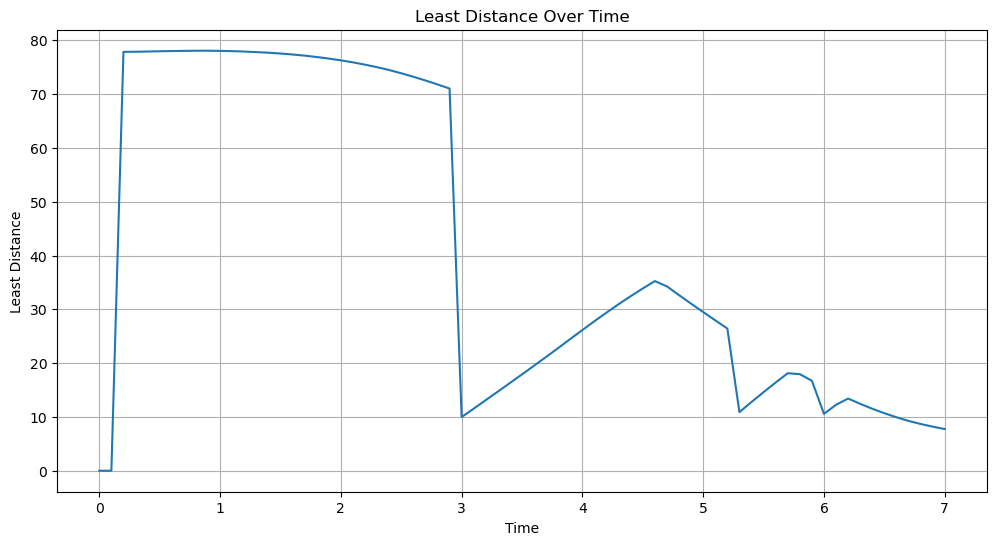

In [108]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(final_data_2['time'], final_data_2['least_distance'])
plt.title('Least Distance Over Time')
plt.xlabel('Time')
plt.ylabel('Least Distance')
plt.grid(True)
plt.show()

In [109]:
#Separate dates for future plotting
final_data_2['time'] = pd.to_datetime(final_data_2['time']*10000000)
train_dates_2 = final_data_2['time']
final_data_2.set_index('time', inplace=True)

In [110]:
# Selecting the relevant columns
columns = ['relative_speed', 'least_distance']

# Splitting the dataset into training and testing sets
train_df = final_data_2[columns][:-20]  # All data except the last 12 observations
test_df = final_data_2[columns][-20:]   # Last 12 observations


In [111]:
model = VAR(train_df.diff()[1:])

In [113]:
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       3.285*      3.370*      26.71*      3.316*
1        3.481       3.735       32.53       3.573
2        3.669       4.091       39.30       3.821
3        3.821       4.413       46.01       4.035
4        3.941       4.701       52.27       4.216
5        4.061       4.990       59.76       4.397
6        4.218       5.316       71.31       4.615
7        4.292       5.559       78.99       4.750
8        4.241       5.676       77.92       4.760
9        4.391       5.995       95.26       4.971
10       4.571       6.345       122.0       5.213
--------------------------------------------------


In [114]:
var_model = VARMAX(train_df, order=(9,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=True)
print(fitted_model.summary())

                                    Statespace Model Results                                    
Dep. Variable:     ['relative_speed', 'least_distance']   No. Observations:                   51
Model:                                           VAR(9)   Log Likelihood                -326.782
                                            + intercept   AIC                            735.563
Date:                                  Wed, 06 Dec 2023   BIC                            814.768
Time:                                          23:35:15   HQIC                           765.830
Sample:                                      01-01-1970                                         
                                           - 01-01-1970                                         
Covariance Type:                                    opg                                         
Ljung-Box (L1) (Q):            16.86, 3.16   Jarque-Bera (JB):          82.71, 2.86
Prob(Q):                        0.00, 0.08 

In [115]:
n_forecast = 10
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [116]:
predictions.columns=['relative_speed_predicted','least_distance_predicted']
predictions

,relative_speed_predicted,least_distance_predicted
1970-01-01 00:00:00.051,15.263709,42.264777
1970-01-01 00:00:00.052,13.175797,52.662633
1970-01-01 00:00:00.053,12.767018,46.299697
1970-01-01 00:00:00.054,12.638580,35.575141
1970-01-01 00:00:00.055,12.774490,36.083840
1970-01-01 00:00:00.056,11.925733,48.689582
1970-01-01 00:00:00.057,10.949409,58.659311
1970-01-01 00:00:00.058,10.038718,67.237970
1970-01-01 00:00:00.059,8.779068,78.821417
1970-01-01 00:00:00.060,7.239884,87.402688


In [117]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [118]:
test_vs_pred

,relative_speed,least_distance,relative_speed_predicted,least_distance_predicted
1970-01-01 00:00:00.051,15.34,27.95,15.263709,42.264777
1970-01-01 00:00:00.052,15.20,26.43,13.175797,52.662633
1970-01-01 00:00:00.053,19.30,10.89,12.767018,46.299697
1970-01-01 00:00:00.054,18.88,12.78,12.638580,35.575141
1970-01-01 00:00:00.055,18.34,14.61,12.774490,36.083840
1970-01-01 00:00:00.056,17.79,16.39,11.925733,48.689582
1970-01-01 00:00:00.057,17.28,18.12,10.949409,58.659311
1970-01-01 00:00:00.058,12.97,17.95,10.038718,67.237970
1970-01-01 00:00:00.059,12.24,16.72,8.779068,78.821417
1970-01-01 00:00:00.060,17.71,10.57,7.239884,87.402688


<Axes: >

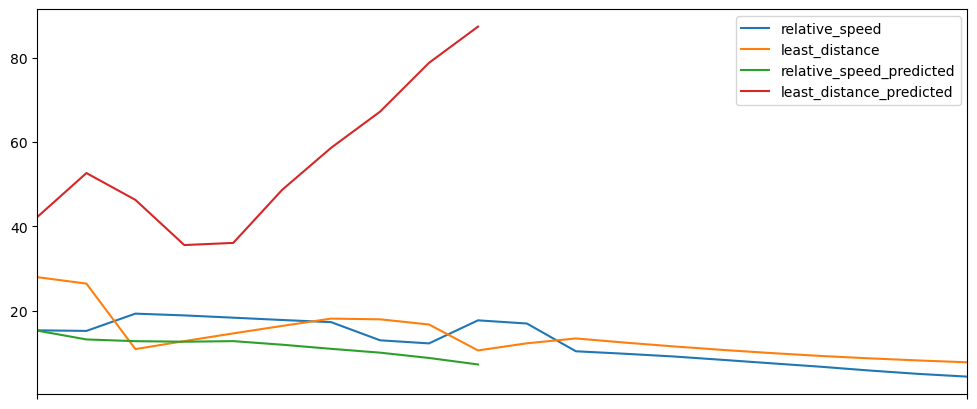

In [119]:
test_vs_pred.plot(figsize=(12,5))